                                    EN2550: Assignment 03 on Object Counting on a Conveyor Belt

Name : Jegakumaran P.         
Index number : 190280N

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

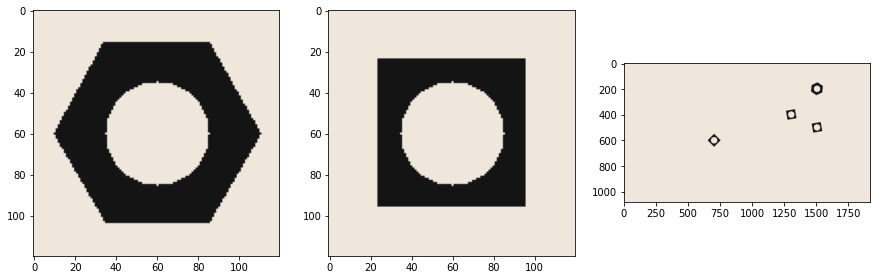

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('Assignment Images/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('Assignment Images/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('Assignment Images/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(15,15))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

1. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

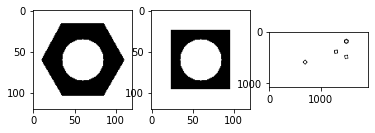

Automatic threshold for hexnut_template =  20
Automatic threshold for squarenut_template =  20
Automatic threshold for conveyor_f100 =  20


In [33]:
import skimage
hexnut_gray=cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_gray=cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_gray=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

th_hexnut,bw_hexnut=cv.threshold(hexnut_gray,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
th_squarenut,bw_squarenut=cv.threshold(squarenut_gray,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)
th_conveyor,bw_conveyor=cv.threshold(conveyor_gray,0,255,cv.THRESH_BINARY + cv.THRESH_OTSU)

t_hexnut = skimage.filters.threshold_otsu(hexnut_gray)
t_squarenut = skimage.filters.threshold_otsu(squarenut_gray)
t_conveyor = skimage.filters.threshold_otsu(conveyor_gray)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(bw_hexnut, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(bw_squarenut, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(bw_conveyor, cv.COLOR_RGB2BGR))
plt.show()
print("Automatic threshold for hexnut_template = ", t_hexnut)
print("Automatic threshold for squarenut_template = ", t_squarenut)
print("Automatic threshold for conveyor_f100 = ", t_conveyor)

1. Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

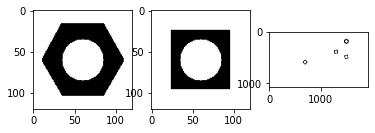

In [34]:
w=3
kernel=np.ones((w,w),np.uint8)
closed_hexnut=cv.morphologyEx(bw_hexnut,cv.MORPH_CLOSE,kernel)
closed_squarenut=cv.morphologyEx(bw_squarenut,cv.MORPH_CLOSE,kernel)
closed_conveyor=cv.morphologyEx(bw_conveyor,cv.MORPH_CLOSE,kernel)

fig, ax = plt. subplots(1,3)
ax[0].imshow(cv.cvtColor(closed_hexnut, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(closed_squarenut, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(closed_conveyor, cv.COLOR_RGB2BGR))
plt.show()

1. Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions      
    1. How many connected components are detected in each image?
    2. What are the statistics? Interpret these statistics.
    3. What are the centroids?
             
For the hexnut template, you should get the object area in pixel as approximately 4728.

In [39]:
retval_hexnut,labels_hexnut,stats_hexnut,centroids_hexnut=cv.connectedComponentsWithStats(bw_hexnut)
colormapped_hexnut=cv.applyColorMap((labels_hexnut/np.amax(labels_hexnut)*255).astype('uint8'),cv.COLORMAP_PARULA)

retval_squarenut,labels_squarenut,stats_squarenut,centroids_squarenut=cv.connectedComponentsWithStats(bw_squarenut)
colormapped_squarenut=cv.applyColorMap((labels_squarenut/np.amax(labels_squarenut)*255).astype('uint8'),cv.COLORMAP_PARULA)

retval_conveyor,labels_conveyor,stats_conveyor,centroids_conveyor=cv.connectedComponentsWithStats(bw_conveyor)
colormapped_conveyor=cv.applyColorMap((labels_conveyor/np.amax(labels_conveyor)*255).astype('uint8'),cv.COLORMAP_PARULA)

print('Number of connecetd components detected in hexnut template =',len(stats_hexnut))
for i,s in enumerate(stats_hexnut):
    print('Item',i+1,'--> area in pixels =',s[4])
    (cX, cY) = centroids_hexnut[i]
    print('Item',i+1,'--> centroids = (',cX,',',cY,')')
print('\n')
print('Number of connecetd components detected in squarenut template =',len(stats_squarenut))
for i,s in enumerate(stats_squarenut):
    print('Item',i+1,'--> area in pixels =',s[4])
    (cX, cY) = centroids_squarenut[i]
    print('Item',i+1,'--> centroids = (',cX,',',cY,')')
print('\n')
print('Number of connecetd components detected in hexnut template =',len(stats_conveyor))
for i,s in enumerate(stats_conveyor):
    print('Item',i+1,'--> area in pixels =',s[4])
    (cX, cY) = centroids_conveyor[i]
    print('Item',i+1,'--> centroids = (',cX,',',cY,')')

Number of connecetd components detected in hexnut template = 3
Item 1 --> area in pixels = 4724
Item 1 --> centroids = ( 59.83361558001693 , 59.22290431837426 )
Item 2 --> area in pixels = 7715
Item 2 --> centroids = ( 59.168632534024624 , 59.54257939079715 )
Item 3 --> area in pixels = 1961
Item 3 --> centroids = ( 60.0 , 60.0 )


Number of connecetd components detected in squarenut template = 3
Item 1 --> area in pixels = 3223
Item 1 --> centroids = ( 59.19578032888613 , 59.19578032888613 )
Item 2 --> area in pixels = 9216
Item 2 --> centroids = ( 59.5 , 59.5 )
Item 3 --> area in pixels = 1961
Item 3 --> centroids = ( 60.0 , 60.0 )


Number of connecetd components detected in hexnut template = 6
Item 1 --> area in pixels = 13938
Item 1 --> centroids = ( 1274.9205050939877 , 400.1106328024107 )
Item 2 --> area in pixels = 2051818
Item 2 --> centroids = ( 956.2467811472558 , 540.8845999011609 )
Item 3 --> area in pixels = 1961
Item 3 --> centroids = ( 1500.0 , 200.0 )
Item 4 --> area i

1. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.      
Display these contours. You should see something like the following:

                                    Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

1. Open the sequence and play it using the code below.

In [ ]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

1. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

1. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [ ]:
# Yor code here.


# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

#Rough works

In [ ]:
for i,s in enumerate(stats_hexnut):
	x = stats_hexnut[i, cv.CC_STAT_LEFT]
	y = stats_hexnut[i, cv.CC_STAT_TOP]
	w = stats_hexnut[i, cv.CC_STAT_WIDTH]
	h = stats_hexnut[i, cv.CC_STAT_HEIGHT]
	area = stats_hexnut[i, cv.CC_STAT_AREA]
	print('area ',area,' i=',i)
	(cX, cY) = centroids_hexnut[i]
	print('Item',i,' centroids =',cX,' ',cY)
out=bw_hexnut.copy()
cv.rectangle(out, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv.circle(out, (int(cX), int(cY)), 4, (0, 0, 255), -1)
plt.imshow(cv.cvtColor(out, cv.COLOR_RGB2BGR))